<a href="https://colab.research.google.com/github/nestoredduardo/two-year-churn-predictive-model/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Scientist Hackathon**

# 1. Overview

## Problem

* Kin Security has seen that a lot of its clients have canceled “Kin Safety” before two years.
* 80% of this cost is assumed by Kin Security in order to be able to match the prices of its competition. 
* Therefore, if a client leaves before two years, the company is not able to recover their investment.



## Solution

* Develop a classification model that
allows them to predict if a client will stay less than two years with the product.

# 2. Obtain Data

In [1]:
import pandas as pd

In [2]:
tb_clients_path = '/content/drive/MyDrive/Jobs/KIN/clients_table.txt'
tb_credit_score_path = '/content/drive/MyDrive/Jobs/KIN/credit_score_table.txt'
tb_products_path = '/content/drive/MyDrive/Jobs/KIN/products_table.txt'
tb_transactions_path = '/content/drive/MyDrive/Jobs/KIN/transactions_table.txt'

In [3]:
df_clients = pd.read_csv(tb_clients_path)
df_credit_score = pd.read_csv(tb_credit_score_path)
df_products = pd.read_csv(tb_products_path)
df_transactions = pd.read_csv(tb_transactions_path)

# 3. Scrub Data

In [4]:
df_clients.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.0,0.0,121219.28,2019-01-08,NaN,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.0,1.0,159663.59,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
4,15365443,EBERLE,Italy,Male,1.0,0.0,35521.28,2014-01-26,2015-12-04,1972-12-21


In [5]:
df_clients.shape

(1545000, 10)

## Desired Population:
a. Contracts from 2015 onwards.

b. Operations in Italy were closed this year (2019).


c. Take out clients with more than 75% of their info missing.

d. Each client should only have one contract in the database, no more.

e. Remember that for a client to be eligible, it must have at least two years of information within the company (even if it canceled the product).

### a. Contracts from 2015 onwards.

In [6]:
df_clients_desired = df_clients[df_clients['application_date'] >= '2015-01-01']
print(df_clients_desired.head())
print(df_clients_desired.shape)

   CustomerId   Surname Geography  ... application_date   exit_date  birth_date
0    15745584     EIRLS   Germany  ...       2018-12-14         NaN  1997-09-18
1    14990118    MOLOCK     Italy  ...       2019-01-08         NaN  1980-08-03
3    14648573     NALLS     Spain  ...       2019-06-19         NaN  1979-02-27
5    15638124  BRASHERS     Italy  ...       2018-02-23         NaN  1983-01-13
7    14523468  LASKOSKI     Spain  ...       2017-12-28  2018-11-19  1972-10-30

[5 rows x 10 columns]
(623242, 10)


### b. Operations in Italy were closed this year (2019).

In [7]:
df_clients_desired = df_clients_desired[df_clients_desired['Geography'] != 'Italy']
print(df_clients_desired.head())
print(df_clients_desired.shape)

    CustomerId   Surname Geography  ... application_date   exit_date  birth_date
0     15745584     EIRLS   Germany  ...       2018-12-14         NaN  1997-09-18
3     14648573     NALLS     Spain  ...       2019-06-19         NaN  1979-02-27
7     14523468  LASKOSKI     Spain  ...       2017-12-28  2018-11-19  1972-10-30
14    15165393  LABIANCA     Spain  ...       2018-02-22  2019-06-11  1974-07-11
15    14611239     DOKKA    France  ...       2019-02-24         NaN  1986-04-26

[5 rows x 10 columns]
(487424, 10)


### c. Take out clients with more than 75% of their info missing.

In [8]:
df_clients_desired.isna().sum()

CustomerId               0
Surname              23362
Geography            23349
Gender               23349
HasCrCard            23349
IsActiveMember       23349
EstimatedSalary      23349
application_date         0
exit_date           382626
birth_date           23349
dtype: int64

In [9]:
number_info_missing = 75/100 * 9
print(number_info_missing)

6.75


In [10]:
df_clients_desired = df_clients_desired[df_clients_desired.isnull().sum(axis=1) < number_info_missing]
print(df_clients_desired.head())
print(df_clients_desired.shape)

    CustomerId   Surname Geography  ... application_date   exit_date  birth_date
0     15745584     EIRLS   Germany  ...       2018-12-14         NaN  1997-09-18
3     14648573     NALLS     Spain  ...       2019-06-19         NaN  1979-02-27
7     14523468  LASKOSKI     Spain  ...       2017-12-28  2018-11-19  1972-10-30
14    15165393  LABIANCA     Spain  ...       2018-02-22  2019-06-11  1974-07-11
15    14611239     DOKKA    France  ...       2019-02-24         NaN  1986-04-26

[5 rows x 10 columns]
(464075, 10)


### d. Each client should only have one contract in the database, no more.

In [11]:
df_clients_desired.drop_duplicates(subset=['CustomerId'],keep= 'first', inplace= True)
print(df_clients_desired.head())
print(df_clients_desired.shape)

    CustomerId   Surname Geography  ... application_date   exit_date  birth_date
0     15745584     EIRLS   Germany  ...       2018-12-14         NaN  1997-09-18
3     14648573     NALLS     Spain  ...       2019-06-19         NaN  1979-02-27
7     14523468  LASKOSKI     Spain  ...       2017-12-28  2018-11-19  1972-10-30
14    15165393  LABIANCA     Spain  ...       2018-02-22  2019-06-11  1974-07-11
15    14611239     DOKKA    France  ...       2019-02-24         NaN  1986-04-26

[5 rows x 10 columns]
(450562, 10)


### e. Remember that for a client to be eligible, it must have at least two years of information within the company (even if it canceled the product).

In [12]:
today_date = '30/11/2019'

In [13]:
application_date = pd.to_datetime(df_clients_desired['application_date'])
df_clients_desired['exit_date'] = df_clients_desired['exit_date'].fillna(today_date)
exit_date = pd.to_datetime(df_clients_desired['exit_date'])

In [14]:
df_clients_desired['application_date'] = application_date
df_clients_desired['exit_date'] = exit_date
df_clients_desired.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,2019-11-30,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,2019-11-30,1979-02-27
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11
15,14611239,DOKKA,France,Male,0.0,1.0,72210.60,2019-02-24,2019-11-30,1986-04-26


In [15]:
df_clients_desired = df_clients_desired[df_clients_desired['exit_date'] - df_clients_desired['application_date'] >= '730 days']

In [16]:
print(df_clients_desired.head())
print(df_clients_desired.shape)

      CustomerId        Surname  ...  exit_date  birth_date
75      15610711       Eluemuno  ... 2019-11-27  1976-10-21
484     15594720          Scott  ... 2019-11-30  1982-05-14
901     15706552  Odinakachukwu  ... 2019-10-02  1979-09-09
1440    15594084       Anderson  ... 2019-09-07  1993-06-08
1543    15756871          Capon  ... 2018-04-29  1976-04-20

[5 rows x 10 columns]
(7963, 10)


# 4. Explore Data

### Age

In [17]:
y = pd.DataFrame(df_clients_desired['IsActiveMember'])
y['IsActiveMember'].value_counts(normalize = True) *100

1.0    55.456486
0.0    44.543514
Name: IsActiveMember, dtype: float64

In [18]:
y['IsActiveMember'].value_counts()

1.0    4416
0.0    3547
Name: IsActiveMember, dtype: int64

In [19]:
dataset = df_clients_desired[['CustomerId', 'EstimatedSalary', 'HasCrCard']]
df_dataset = pd.DataFrame(data = dataset)

In [20]:
from datetime import datetime, date

def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [21]:
df_dataset['Age'] = df_clients_desired['birth_date'].apply(age)

In [22]:
df_dataset = df_dataset.set_index('CustomerId')

### Number of products

In [23]:
df_products.set_index('CustomerId')

,ContractId,Products
CustomerId,,
14993808,5Xo9sCduOGo5EhBYhzKrSlLIA,Product B
15560417,3nQbqbnpTeSkYIJWT1UDe1GZ1,Product B
15406428,PD9KwDPOwyJWO6LJKPGBbkrCz,Product C
15604313,IhS7pz8lu07LCZSqYNlL0fuLP,Product B
14952409,ftUey4oVmkZj8RaBVFH6SNzVM,Product C
...,...,...
14723530,gG68mjjODmTNM21QPEeAKr0DZ,Product C
15837225,yWf0PHzqSjJvadbdMji4XtX5T,Product D
14661828,5kerYoMKP03ebWSrloZBjmWKz,Product C


In [24]:
products_count = df_products['CustomerId'].value_counts()

In [25]:
df_products_count = pd.DataFrame(data=products_count)

In [26]:
df_products_count = df_products_count.loc[df_dataset.index,:]

In [27]:
df_products_count = df_products_count.rename(columns={'CustomerId' : 'NumProducts'})

In [28]:
df_products_count

,NumProducts
CustomerId,
15610711,1
15594720,2
15706552,1
15594084,2
15756871,1
...,...
15613180,1
15689152,1
15787204,1


### Balance at the moment of application

In [29]:
df_transactions = df_transactions.set_index('CustomerId')

In [30]:
df_transactions = df_transactions.loc[df_dataset.index,:]

In [31]:
df_balance = df_transactions.groupby('CustomerId', as_index= True)[['Value']].sum()
df_balance

,Value
CustomerId,
15565701,1.619939e+05
15565714,6.443006e+04
15565779,5.780932e+04
15565796,9.604855e+04
15565806,-4.547474e-13
...,...
15815615,1.419521e+05
15815628,1.138999e+05
15815645,1.523037e+05


In [32]:
df_balance = df_balance.rename(columns={'Value' : 'Balance'})

### Credit bureau Scores

In [33]:
def get_month(appDate):
    return appDate.month, appDate.year

In [34]:
df_client_app_date = pd.DataFrame(df_clients_desired['CustomerId'])
df_client_app_date['Month'], df_client_app_date['Year'] = zip(*df_clients_desired['application_date'].apply(get_month))
df_client_app_date = df_client_app_date.set_index('CustomerId')

In [35]:
df_credit_score = df_credit_score.set_index('CustomerId')

In [36]:
df_credit_score = df_credit_score.loc[df_dataset.index,:]

In [37]:
df_credit_score_date = pd.to_datetime(df_credit_score['Date'])
df_credit_score['Date'] = df_credit_score_date
df_credit_score['Month'], df_credit_score['Year']= zip(*df_credit_score['Date'].apply(get_month))

In [38]:
def getScore(row):
    score_by_id = df_credit_score[df_credit_score.index == row.name]
    score_by_month = score_by_id[(score_by_id['Year'] == row['Year']) & (score_by_id['Month'] == row['Month'])]
    return score_by_month['Score'].values[0]

In [39]:
score = df_client_app_date.apply(getScore, axis=1, )

In [40]:
df_score = pd.DataFrame(score)
df_score = df_score.rename(columns={0 : 'Score'})

# Joining Data

In [41]:
X = pd.concat([df_dataset, df_products_count, df_balance, df_score], axis=1, join='inner')

In [42]:
X.describe()

,EstimatedSalary,HasCrCard,Age,NumProducts,Balance,Score
count,7963.000000,7963.000000,7963.000000,7963.000000,7.963000e+03,7963.000000
mean,99738.391772,0.707146,42.684918,1.544267,7.274530e+04,651.853196
std,57405.586966,0.455101,10.175047,0.509536,6.284804e+04,95.653837
min,90.070000,0.000000,21.000000,1.000000,-1.477929e-12,405.000000
25%,50783.490000,0.000000,36.000000,1.000000,0.000000e+00,585.000000
50%,99645.040000,1.000000,41.000000,2.000000,9.207268e+04,653.000000
75%,148609.955000,1.000000,47.000000,2.000000,1.264103e+05,718.000000
max,199992.480000,1.000000,98.000000,3.000000,2.215328e+05,850.000000


# 5. Model Data

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10)

To evaluate the effectiveness of these models, we could use Precision or Recall. Precision will give us the proportion of positive identifications that were indeed correct, while recall will determine the proportion of real positives that were correctly identified.

Considering the problem we are trying to solve, Recall will be more suitable for this study, as the objective here is to identify the maximum number of clients that are actually prone to stop doing business with the company, even if some "non-churners" are wrongly identified as "churners". That is to say, in our case, it is better to pursue a smaller number of False Negatives possible.

Also, let's draw a confusion matrix for each of these algorithms to visualize their performance on the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       352
         1.0       0.56      1.00      0.72       445

    accuracy                           0.56       797
   macro avg       0.28      0.50      0.36       797
weighted avg       0.31      0.56      0.40       797



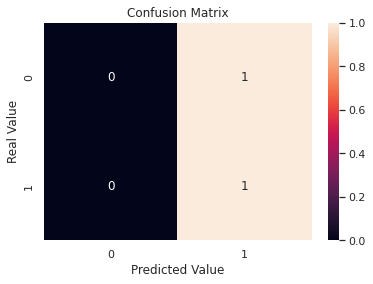

In [45]:
# final SVC model
svc = SVC()
svc.fit(X_train, y_train)

# prediction
X_test_svc = X_test
y_pred_svc = svc.predict(X_test_svc)

# classification report
print(classification_report(y_test, y_pred_svc))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_svc, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

SVC model has bias and is predicting 1 for all data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm 

              precision    recall  f1-score   support

         0.0       0.46      0.24      0.32       352
         1.0       0.56      0.77      0.65       445

    accuracy                           0.54       797
   macro avg       0.51      0.51      0.49       797
weighted avg       0.52      0.54      0.51       797



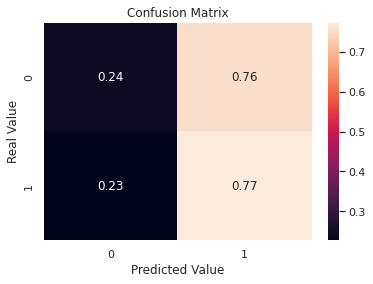

In [50]:
# final Logistic Regression model
lr = LogisticRegression(solver='newton-cg', C=0.0001)
lr.fit(X_train, y_train)

# prediction
X_test_lr = X_test
y_pred_lr = lr.predict(X_test_lr)

# classification report
print(classification_report(y_test, y_pred_lr))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lr, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

Logistic Regression model has a balanced recall with 0.77 for positive values and 0.24 for negative values

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.49      0.37      0.42       352
         1.0       0.58      0.70      0.64       445

    accuracy                           0.55       797
   macro avg       0.54      0.53      0.53       797
weighted avg       0.54      0.55      0.54       797



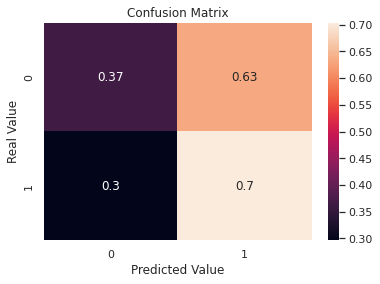

In [49]:
# final XGBoost model
xgb = XGBClassifier(max_depth=8, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)
xgb.fit(X_train, y_train)

# prediction
X_test_xgb = X_test
y_pred_xgb = xgb.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

XGBoost model has a more balanced recall with 0.7 for positive values and 0.37 for negative values

# 6. Interpreting Data

Between the three models, XGBoost is the model wich fits better for the test data and shows a more balanced recall with 0.70 for positive value in the test set which for the business is desirable because is better to pursue a smaller number of False Negatives(clients who will drop the product and the model predict they don't) possible.

For that reason, XGBoost will be the chosen model with an accuracy of 0.55.